# Load Dataset

In [610]:
import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [611]:
df=pd.read_csv(r"C:\Users\user\Downloads\bank_data.csv",sep=',')

In [612]:
df.head()

,Unnamed: 0,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


## Check for null values

In [613]:

df.isnull()

,Unnamed: 0,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1002,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1003,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1004,False,True,True,True,True,True,True,True,True,True,False,False,False,False,True


## Visualise the null Values

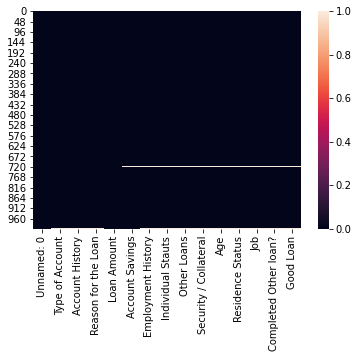

In [614]:
#Visualise the null Values
sns.heatmap(df.isnull())

In [615]:
#View the columns with maximum number of null values 
df[df["Employment History"].isnull()]

,Unnamed: 0,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [616]:
df.dropna(axis=0, inplace=True)

In [617]:
df.shape

(1001, 15)

In [618]:
df.describe() #Note the max value in Age is 327

,Unnamed: 0,Loan Amount,Age
count,1001.000000,1.001000e+03,1001.000000
mean,500.861139,-5.447148e+05,35.834166
std,290.170925,1.733783e+07,14.662758
min,0.000000,-5.485413e+08,18.000000
25%,250.000000,1.374000e+03,27.000000
50%,500.000000,2.326000e+03,33.000000
75%,753.000000,3.980000e+03,42.000000
max,1003.000000,1.842700e+04,327.000000


In [619]:
df.dtypes

Unnamed: 0                 int64
Type of Account           object
Account History           object
Reason for the Loan       object
Loan Amount              float64
Account Savings           object
Employment History        object
Individual Stauts         object
Other Loans               object
Security / Collateral     object
Age                      float64
Residence Status          object
Job                       object
Completed Other loan?     object
Good Loan                 object
dtype: object

In [620]:
df["Type of Account"].nunique()

4

In [621]:
for column in df:
    value_counts=np.unique(df[column])
    unique_values=len(value_counts)
    if unique_values <=10:
        print("The value counts for {} :{} \n The unique_values :{}".format(column,unique_values,value_counts))

The value counts for Type of Account :4 
 The unique_values :['No Data' 'Type A' 'Type B' 'Type C']
The value counts for Account History :3 
 The unique_values :['Average (known delays)' 'Good' 'critical']
The value counts for Reason for the Loan :10 
 The unique_values :['Advance Edu/training' 'All other' 'Buying a New Car' 'Buying a Used Car'
 'Home Devices' 'Home furniture' 'Learning / Edu purposes' 'Renovation'
 'Support for Business' 'TV']
The value counts for Account Savings :5 
 The unique_values :['0-200' '1000+' '200-500' '500-1000' 'No Data']
The value counts for Employment History :5 
 The unique_values :['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
The value counts for Individual Stauts :5 
 The unique_values :['Divorced' 'Female' 'Female_' 'Male' 'Married']
The value counts for Other Loans :2 
 The unique_values :['No' 'Yes']
The value counts for Security / Collateral :4 
 The unique_values :['No Security' 'Property - Real Estate' 'Savings Account' 'Vehicle

## Visualise the Continuous values

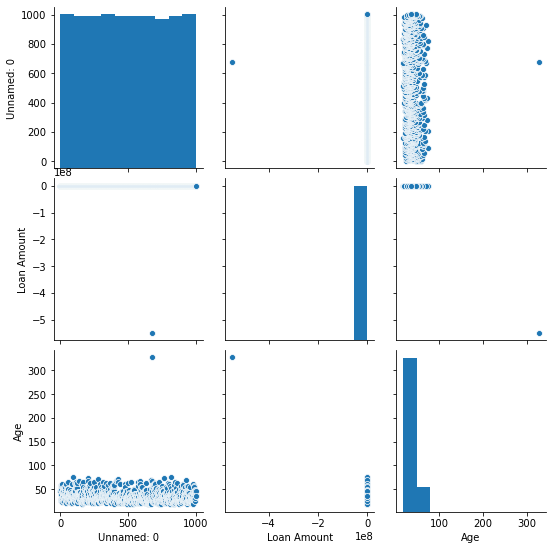

In [622]:


sns.pairplot(df)

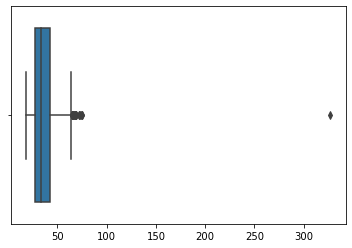

In [623]:
sns.boxplot([df.Age])

In [606]:
#The above plot shows that there is a presence of outliers on the age column

age_outlier=df[df.Age>100].index

In [624]:
df.drop(age_outlier,inplace=True)

In [626]:
df.drop(["Unnamed: 0"],axis=1,inplace=True) #drop the Unnamed: 0 column

In [627]:
df.shape

(1000, 14)

## Visualise the dataset with the dependent variable

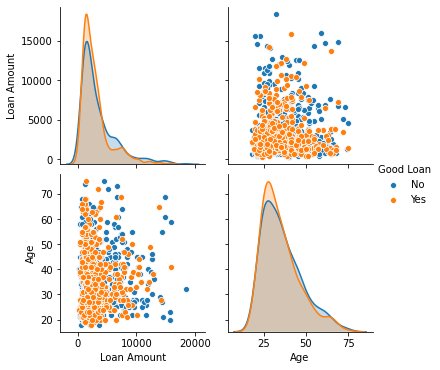

In [629]:
sns.pairplot(df,hue="Good Loan")    #NOTE:As the loan amount increases the number of bad loan increases

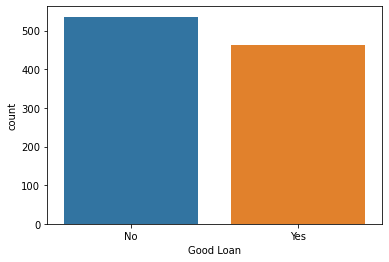

In [633]:
sns.countplot(df["Good Loan"])

## Visualise all the non numeric dependent variables with hue as Good Loan


In [647]:
df.columns
features=['Type of Account', 'Account History', 
        'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?','Reason for the Loan']

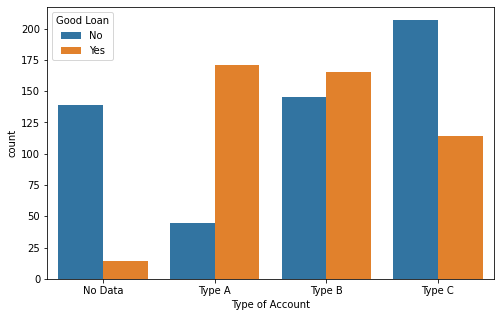

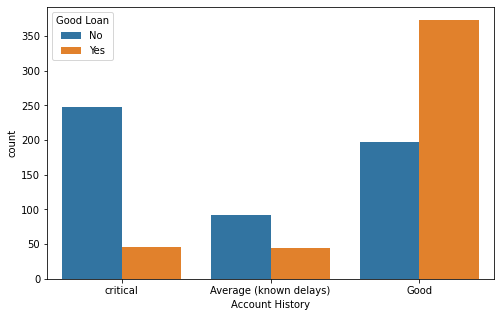

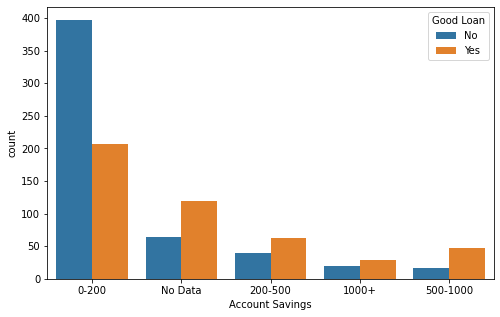

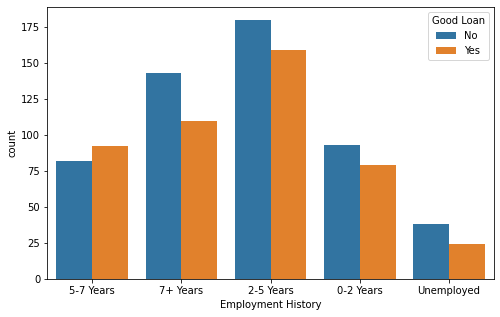

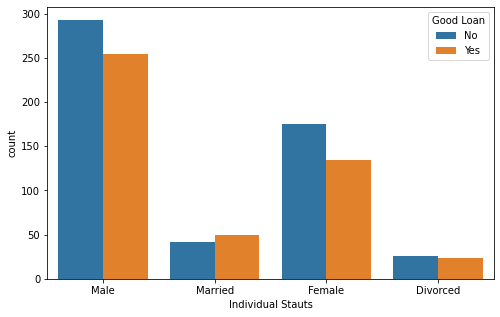

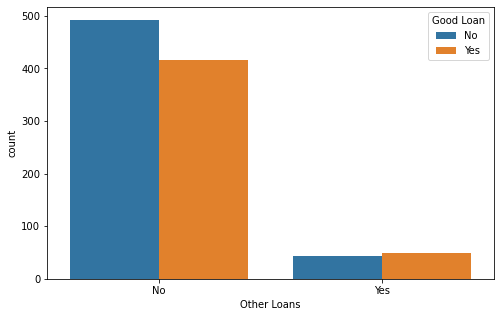

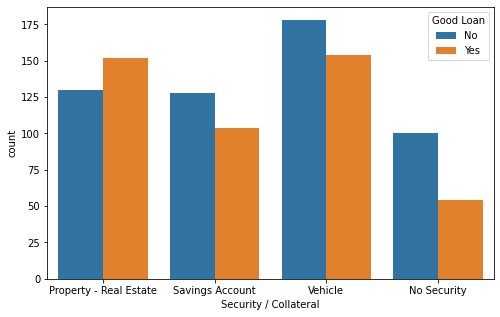

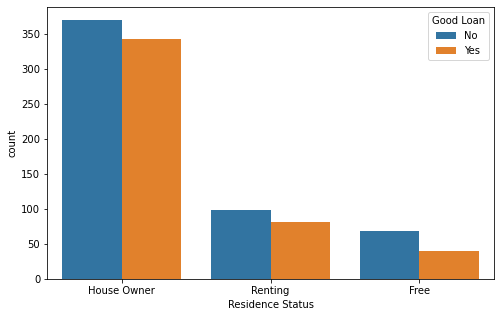

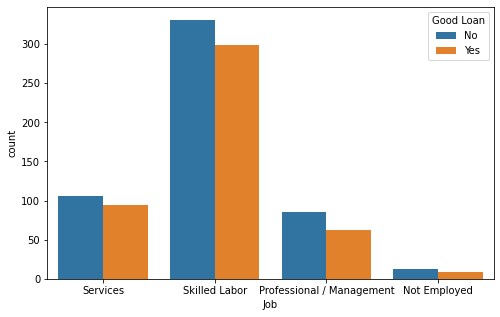

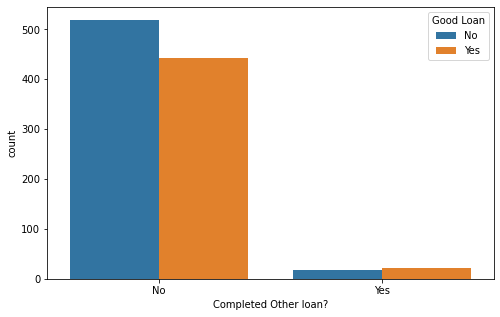

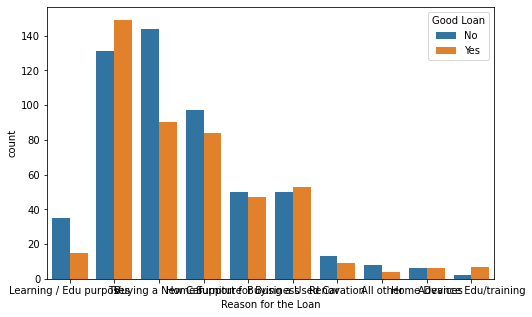

In [646]:
for column in features:
    plt.figure(figsize=(8,5))
    sns.countplot(x= column, hue="Good Loan", data=df)
    plt.show()

## Change the character values to numeric

In [656]:
new_df=pd.get_dummies(df,columns=features)

In [659]:
new_df.head()

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Reason for the Loan_Advance Edu/training,Reason for the Loan_All other,Reason for the Loan_Buying a New Car,Reason for the Loan_Buying a Used Car,Reason for the Loan_Home Devices,Reason for the Loan_Home furniture,Reason for the Loan_Learning / Edu purposes,Reason for the Loan_Renovation,Reason for the Loan_Support for Business,Reason for the Loan_TV
0,2116.0,47.0,No,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2438.0,52.0,No,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2144.0,48.0,No,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,2073.0,25.0,No,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1276.0,59.0,No,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [657]:
print(df.shape)
print(new_df.shape)

(1000, 14)
(1000, 49)
